In [1]:
#import libaries for model
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
%matplotlib inline

In [2]:
# load data trian set
df_train=pd.read_csv('C:/Users/hp/Desktop/assignment/train.csv')
df_train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [3]:
#load test data set
df_test=pd.read_csv('C:/Users/hp/Desktop/assignment/test.csv')
df_test.head()

,ID_code,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,test_0,11.0656,7.7798,12.9536,9.4292,11.4327,-2.3805,5.8493,18.2675,2.1337,...,-2.1556,11.8495,-1.4300,2.4508,13.7112,2.4669,4.3654,10.7200,15.4722,-8.7197
1,test_1,8.5304,1.2543,11.3047,5.1858,9.1974,-4.0117,6.0196,18.6316,-4.4131,...,10.6165,8.8349,0.9403,10.1282,15.5765,0.4773,-1.4852,9.8714,19.1293,-20.9760
2,test_2,5.4827,-10.3581,10.1407,7.0479,10.2628,9.8052,4.8950,20.2537,1.5233,...,-0.7484,10.9935,1.9803,2.1800,12.9813,2.1281,-7.1086,7.0618,19.8956,-23.1794
3,test_3,8.5374,-1.3222,12.0220,6.5749,8.8458,3.1744,4.9397,20.5660,3.3755,...,9.5702,9.0766,1.6580,3.5813,15.1874,3.1656,3.9567,9.2295,13.0168,-4.2108
4,test_4,11.7058,-0.1327,14.1295,7.7506,9.1035,-8.5848,6.8595,10.6048,2.9890,...,4.2259,9.1723,1.2835,3.3778,19.5542,-0.2860,-5.1612,7.2882,13.9260,-9.1846


In [4]:
df_train.shape # to check the shape of train data set

(200000, 202)

In [5]:
df_test.shape # to check the shape of test data set

(200000, 201)

In [6]:
df_train.info()   # to check entries and dtype and memory usage by data
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 201 entries, ID_code to var_199
dtypes: float64(200), object(1)
memory usage: 306.7+ MB


In [7]:
df_train.describe()           #  to describe the mean , std, maximum , minimum, etc... for train data set

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,0.100490,10.679914,-1.627622,10.715192,6.796529,11.078333,-5.065317,5.408949,16.545850,0.284162,...,3.234440,7.438408,1.927839,3.331774,17.993784,-0.142088,2.303335,8.908158,15.870720,-3.326537
std,0.300653,3.040051,4.050044,2.640894,2.043319,1.623150,7.863267,0.866607,3.418076,3.332634,...,4.559922,3.023272,1.478423,3.992030,3.135162,1.429372,5.454369,0.921625,3.010945,10.438015
min,0.000000,0.408400,-15.043400,2.117100,-0.040200,5.074800,-32.562600,2.347300,5.349700,-10.505500,...,-14.093300,-2.691700,-3.814500,-11.783400,8.694400,-5.261000,-14.209600,5.960600,6.299300,-38.852800
25%,0.000000,8.453850,-4.740025,8.722475,5.254075,9.883175,-11.200350,4.767700,13.943800,-2.317800,...,-0.058825,5.157400,0.889775,0.584600,15.629800,-1.170700,-1.946925,8.252800,13.829700,-11.208475
50%,0.000000,10.524750,-1.608050,10.580000,6.825000,11.108250,-4.833150,5.385100,16.456800,0.393700,...,3.203600,7.347750,1.901300,3.396350,17.957950,-0.172700,2.408900,8.888200,15.934050,-2.819550
75%,0.000000,12.758200,1.358625,12.516700,8.324100,12.261125,0.924800,6.003000,19.102900,2.937900,...,6.406200,9.512525,2.949500,6.205800,20.396525,0.829600,6.556725,9.593300,18.064725,4.836800
max,1.000000,20.315000,10.376800,19.353000,13.188300,16.671400,17.251600,8.447700,27.691800,10.151300,...,18.440900,16.716500,8.402400,18.281800,27.928800,4.272900,18.321500,12.000400,26.079100,28.500700


In [8]:
df_test.describe()      #  to describe the mean , std, maximum , minimum, etc... for test data set

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,...,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000
mean,10.658737,-1.624244,10.707452,6.788214,11.076399,-5.050558,5.415164,16.529143,0.277135,7.569407,...,3.189766,7.458269,1.925944,3.322016,17.996967,-0.133657,2.290899,8.912428,15.869184,-3.246342
std,3.036716,4.040509,2.633888,2.052724,1.616456,7.869293,0.864686,3.424482,3.333375,1.231865,...,4.551239,3.025189,1.479966,3.995599,3.140652,1.429678,5.446346,0.920904,3.008717,10.398589
min,0.188700,-15.043400,2.355200,-0.022400,5.484400,-27.767000,2.216400,5.713700,-9.956000,4.243300,...,-14.093300,-2.407000,-3.340900,-11.413100,9.382800,-4.911900,-13.944200,6.169600,6.584000,-39.457800
25%,8.442975,-4.700125,8.735600,5.230500,9.891075,-11.201400,4.772600,13.933900,-2.303900,6.623800,...,-0.095000,5.166500,0.882975,0.587600,15.634775,-1.160700,-1.948600,8.260075,13.847275,-11.124000
50%,10.513800,-1.590500,10.560700,6.822350,11.099750,-4.834100,5.391600,16.422700,0.372000,7.632000,...,3.162400,7.379000,1.892600,3.428500,17.977600,-0.162000,2.403600,8.892800,15.943400,-2.725950
75%,12.739600,1.343400,12.495025,8.327600,12.253400,0.942575,6.005800,19.094550,2.930025,8.584825,...,6.336475,9.531100,2.956000,6.174200,20.391725,0.837900,6.519800,9.595900,18.045200,4.935400
max,22.323400,9.385100,18.714100,13.142000,16.037100,17.253700,8.302500,28.292800,9.665500,11.003600,...,20.359000,16.716500,8.005000,17.632600,27.947800,4.545400,15.920700,12.275800,26.538400,27.907400


In [9]:
# convert target data in data set into the string by replace method
df_train['target']=df_train['target'].replace(1,'yes')
df_train['target']=df_train['target'].replace(0,'no')

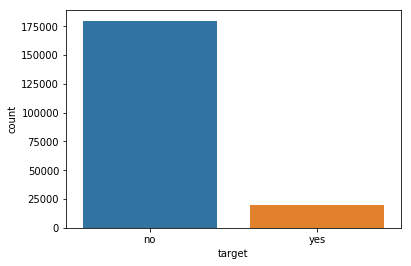

In [10]:
sns.countplot(df_train['target'])                  # plot the target data 

In [11]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [12]:
df_train.groupby('target').count()['ID_code']

target
no     179902
yes     20098
Name: ID_code, dtype: int64

In [13]:
y=df_train['target']
x=df_train.drop(['target','ID_code'],axis=1)
#z=df_test.drop(['ID_code'],axis=1)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [14]:
print('df_train:',x_train.shape)
print('df_test:',x_test.shape)

df_train: (140000, 200)
df_test: (60000, 200)


In [15]:
clf=tree.DecisionTreeClassifier(criterion='entropy').fit(x_train,y_train)

In [16]:
#predict new test cases
y_pred=clf.predict(x_test)

In [17]:
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'yes'], dtype=object)

In [18]:
#create dot file to visulaise tree 
dtreefile=open("dtreefile.dot",'w')
df=tree.export_graphviz(clf,out_file=dtreefile,feature_names=x_train.columns,max_depth=5)


In [ ]:
#build confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)

In [ ]:
cm=pd.crosstab(y_test,y_pred)
cm

col_0,no,yes
target,,
no,48945,5061
yes,4915,1079


In [ ]:
#let  us save TP,TN,FP,FN
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]

In [ ]:
#check the accuracy of model
accuracy_score(y_test,y_pred)*100

83.37333333333333

In [ ]:
#False negative rate
(FN*100)/(TN+FN)

9.125510582992945

In [ ]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
rf_model=RandomForestClassifier(n_estimators=50).fit(x_train,y_train)

In [ ]:
rf_pred=rf_model.predict(x_test)

In [ ]:
rf_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
#build confusion matrix
cm=pd.crosstab(y_test,rf_pred)
#let  us save TP,TN,FP,FN
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
#for check the accuracy
#accuracy_score(y_test,y_pred)*100
((TP+TN)*100)/(TN+TN+FP+FN)


47.380609845959505

In [ ]:
# again check again FN rate
(FN*100)/(TN+FN)


9.97832972162027

In [ ]:
# convert target data in data set into the 1 and 0 by replace method
df_train['target']=df_train['target'].replace('yes',1)
df_train['target']=df_train['target'].replace('no',0)

In [ ]:
#prepare data for logistic regression
#create logistic data .save target variable first
df_train_logit=pd.DataFrame(df_train['target'])

In [ ]:
df_train_logit.head()

,target
0,0
1,0
2,0
3,0
4,0


In [ ]:
#add continous variable
df_train_logit=df_train_logit.join(df_train[x.columns])

In [ ]:
df_train_logit.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,-5.8609,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,6.2654,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


In [ ]:
df_train_logit.shape

(200000, 201)

In [ ]:
sample_index=np.random.rand(len(df_train_logit)) < 0.8
train=df_train_logit[sample_index]
test=df_train_logit[~sample_index]

In [ ]:
tcolumns= train.columns[1:200]
tcolumns

Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'var_189', 'var_190', 'var_191', 'var_192', 'var_193', 'var_194',
       'var_195', 'var_196', 'var_197', 'var_198'],
      dtype='object', length=199)

In [ ]:
import statsmodels.api as sm
logit=sm.Logit(train['target'],train[tcolumns]).fit()

Optimization terminated successfully.
         Current function value: 0.231487
         Iterations 8


In [ ]:
logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 target   No. Observations:               160319
Model:                          Logit   Df Residuals:                   160120
Method:                           MLE   Df Model:                          198
Date:                Tue, 10 Dec 2019   Pseudo R-squ.:                  0.2905
Time:                        18:55:16   Log-Likelihood:                -37112.
converged:                       True   LL-Null:                       -52308.
                                        LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
var_0          0.0553      0.003     17.706      0.000       0.049       0.061
var_1          0.0414      0.002     17.417      0.000       0.037       0.046
var_2          0.0679      0.004     18.922      0.000       0.061       0.075
var_3          0.0181      0.005      3.815      0.000       0.009       0.027
var_4          0.0249      0.006      4.195      0.000       0.013       0.037
var_5          0.0140      0.001     11.418      0.000       0.012       0.016
var_6          0.2657      0.011     24.094      0.000       0.244       0.287
var_7         -0.0018      0.003     -0.621      0.535      -0.007       0.004
var_8          0.0178      0.003      6.138      0.000       0.012       0.024
var_9         -0.1130      0.008    -14.538      0.000      -0.128      -0.098
var_10         0.0007      0.002      0.378      0.706      -0.003       0.004
var_11         0.0125      0.002      7.767      0.000       0.009       0.016
var_12        -1.1500      0.050    -23.109      0.000      -1.248      -1.052
var_13        -0.0374      0.002    -18.152      0.000      -0.041      -0.033
var_14        -0.0103      0.004     -2.381      0.017      -0.019      -0.002
var_15         0.1549      0.023      6.607      0.000       0.109       0.201
var_16         0.0069      0.004      1.822      0.068      -0.001       0.014
var_17         0.0004      0.001      0.305      0.761      -0.002       0.003
var_18         0.0173      0.001     14.144      0.000       0.015       0.020
var_19         0.0049      0.001      4.047      0.000       0.003       0.007
var_20        -0.0111      0.002     -6.762      0.000      -0.014      -0.008
var_21        -0.0238      0.001    -20.189      0.000      -0.026      -0.021
var_22         0.0668      0.003     20.011      0.000       0.060       0.073
var_23        -0.1667      0.018     -9.068      0.000      -0.203      -0.131
var_24         0.0256      0.003     10.050      0.000       0.021       0.031
var_25         0.1471      0.034      4.376      0.000       0.081       0.213
var_26         0.0322      0.002     20.123      0.000       0.029       0.035
var_27        -0.0037      0.006     -0.590      0.555      -0.016       0.009
var_28        -0.0924      0.012     -7.504      0.000      -0.117      -0.068
var_29         0.0105      0.004      2.848      0.004       0.003       0.018
var_30     -5.295e-05      0.001     -0.044      0.965      -0.002       0.002
var_31        -0.0401      0.004     -8.945      0.000      -0.049      -0.031
var_32         0.0414      0.004     11.100      0.000       0.034       0.049
var_33        -0.0348      0.002    -15.518      0.000      -0.039      -0.030
var_34        -0.3285      0.018    -18.448      0.000      -0.363      -0.294
var_35         0.0232      0.002     12.497      0.000       0.020       0.027
var_36        -0.0420      0.003    -13.571      0.000      -0.048      -0.036
var_37         0.0135      0.004      3.155      0.002       0.005       0.022
va

In [ ]:
test['Actual_prob']=logit.predict(test[tcolumns])

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [ ]:
test['ActualVal']=1
test.loc[test.Actual_prob<0.5,'ActualVal']=0

C:\Users\hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hp\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
test.head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,Actual_prob,ActualVal
2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,-4.9193,...,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965,0.046209,0
7,0,13.5580,-7.9881,13.8776,7.5985,8.6543,0.8310,5.6890,22.3262,5.0647,...,3.9906,5.8061,23.1407,-0.3776,4.2178,9.4237,8.6624,3.4806,0.062068,0
9,0,12.5088,1.9743,8.8960,5.4508,13.6043,-16.2859,6.0637,16.8410,0.1287,...,1.0371,3.6885,14.8344,0.4467,14.1287,7.9133,16.2375,14.2514,0.049023,0
11,0,12.7188,-7.9750,10.3757,9.0101,12.8570,-12.0852,5.6464,11.8370,1.2953,...,-0.0503,5.5946,13.6152,2.4058,-1.7183,9.6745,16.7498,-3.9728,0.032282,0
17,0,8.4199,-1.8128,8.1202,5.3955,9.7184,-17.8390,4.0959,15.2860,1.9016,...,3.7903,0.0290,16.2954,0.1470,8.9603,9.4560,19.4505,-5.2407,0.006295,0


In [ ]:
#bulit confusion matrix
cm=pd.crosstab(test['target'],test['ActualVal'])
#let us save TP,TN,FP,FN
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)


91.43922784204027

In [ ]:
(FN*100)/(FN+TP)

73.23448102538326

C:\Users\hp\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


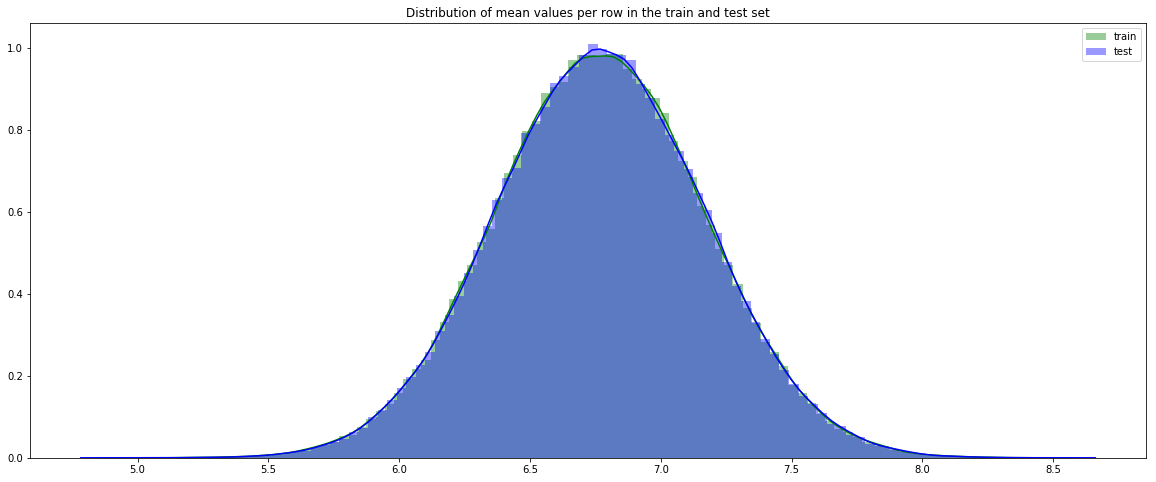

In [ ]:
plt.figure(figsize=(20,8))
features = df_train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(df_train[features].mean(axis=1),color="green", kde=True,bins=100, label='train')
sns.distplot(df_test[features].mean(axis=1),color="blue", kde=True,bins=100, label='test')
plt.legend()
plt.show()

In [ ]:
df_train.corr().head()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
target,1.000000,0.052390,0.050343,0.055870,0.011055,0.010915,0.030979,0.066731,-0.003025,0.019584,...,0.055973,0.047114,-0.042858,-0.017709,-0.022838,0.028285,0.023608,-0.035303,-0.053000,0.025434
var_0,0.052390,1.000000,-0.000544,0.006573,0.003801,0.001326,0.003046,0.006983,0.002429,0.004962,...,0.002752,0.000206,-0.005373,0.001616,-0.001514,0.002073,0.004386,-0.000753,-0.005776,0.003850
var_1,0.050343,-0.000544,1.000000,0.003980,0.000010,0.000303,-0.000902,0.003258,0.001511,0.004098,...,0.006627,0.003621,-0.002604,0.001153,-0.002557,-0.000785,-0.000377,-0.004157,-0.004861,0.002287
var_2,0.055870,0.006573,0.003980,1.000000,0.001001,0.000723,0.001569,0.000883,-0.000991,0.002648,...,0.000197,0.001285,-0.003400,0.000549,0.002104,-0.001070,0.003952,0.001078,-0.000877,0.003855
var_3,0.011055,0.003801,0.000010,0.001001,1.000000,-0.000322,0.003253,-0.000774,0.002500,0.003553,...,0.000151,0.002445,-0.001530,-0.001699,-0.001054,0.001206,-0.002800,0.001164,-0.001651,0.000506


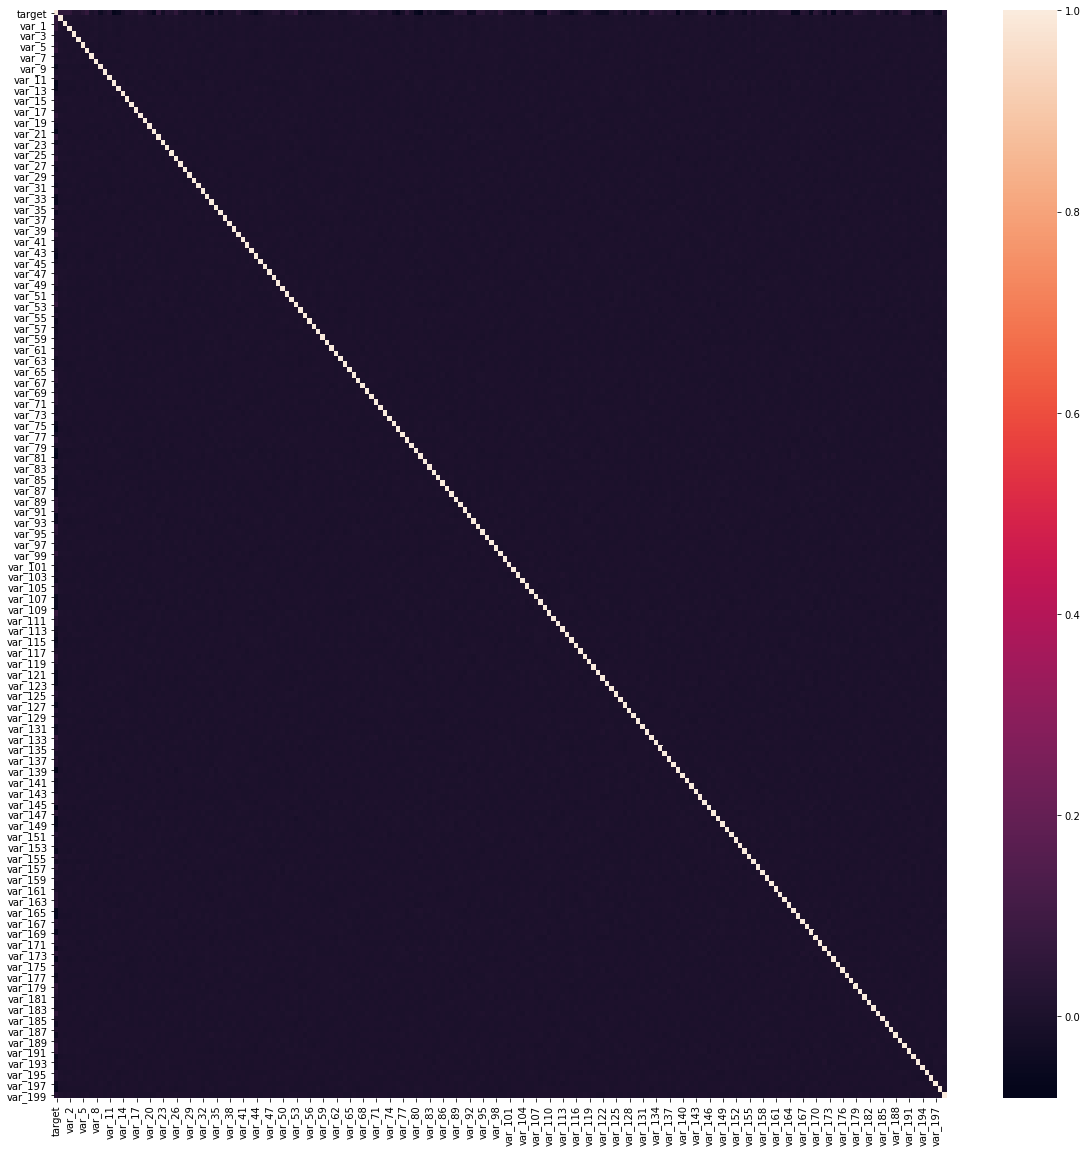

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df_train.corr())

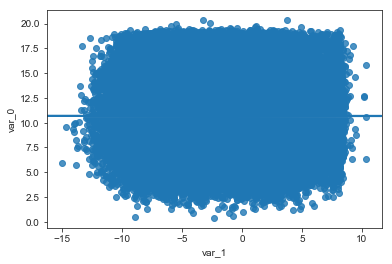

In [ ]:
sns.set_style('white')
sns.set_style('ticks')
sns.regplot(x='var_1',y='var_0',data=df_train)

In [ ]:

sns.pairplot(df_train,hue='target')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
KNN_model=KNeighborsClassifier(n_neighbors=1).fit(x_train,y_train)

In [ ]:
KNN_model

In [ ]:
KNN_predictions=KNN_model.predict(x_test)

In [ ]:
cm=pd.crosstab(y_test,KNN_predictions)
#let us save TP,TN,FP,FN
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)


In [ ]:
#check the FN rate
(FN*100)/(FN+TP)

In [ ]:
from sklearn.naive_bayes import GaussianNB
NB_model=GaussianNB().fit(x_train,y_train)

In [ ]:
NB_predictions=NB_model.predict(x_test)

In [ ]:
cm=pd.crosstab(y_test,NB_predictions)
#let us save TP,TN,FP,FN
TN=cm.iloc[0,0]
FN=cm.iloc[1,0]
TP=cm.iloc[1,1]
FP=cm.iloc[0,1]
((TP+TN)*100)/(TP+TN+FP+FN)


In [ ]:
#check the FN rate
(FN*100)/(FN+TP)